# Neural Spline Flow

In [1]:
# Import required packages
import torch
import numpy as np
import normflows as nf
from torchviz import make_dot
from sklearn.datasets import make_moons
from scipy.special import erf, gamma
from matplotlib import pyplot as plt
import benchmark
from tqdm import tqdm

In [20]:
# Set up model
target = benchmark.Camel()
# Define flows
K = 2
torch.manual_seed(0)

latent_size = 2
hidden_units = 4
hidden_layers = 2
masks = nf.utils.iflow_binary_masks(latent_size)
for mask in masks[::-1]:
    print(mask)
# mask = nf.utils.masks.create_alternating_binary_mask(latent_size, even=True)
# print(mask)
flows = []
#for i in range(K):
#     flows += [nf.flows.CoupledRationalQuadraticSpline(latent_size, hidden_layers, hidden_units)]
#     flows += [nf.flows.LULinearPermute(latent_size)]
#flows += [nf.flows.CoupledRationalQuadraticSpline(latent_size, hidden_layers, hidden_units)]
#flows += [nf.flows.CoupledRationalQuadraticSpline(latent_size, hidden_layers, hidden_units, reverse_mask=True)]
for mask in masks[::-1]:
    flows += [nf.flows.CoupledRationalQuadraticSpline(latent_size, hidden_layers, hidden_units, mask=mask)]
# Set base distribuiton
q0 = nf.distributions.base.Uniform(2, 0.0, 1.0)
    
# Construct flow model
nfm = nf.NormalizingFlow(q0, flows, target)

# Move model on GPU if available
enable_cuda = True
device = torch.device('cuda' if torch.cuda.is_available() and enable_cuda else 'cpu')
nfm = nfm.to(device)

tensor([0, 1], dtype=torch.uint8)
tensor([1, 0], dtype=torch.uint8)


tensor([[1.5382e-02, 1.8156e-02, 2.1321e-02,  ..., 1.2301e-05, 9.5284e-06,
         7.3947e-06],
        [1.8156e-02, 2.1430e-02, 2.5166e-02,  ..., 1.5629e-05, 1.2191e-05,
         9.5284e-06],
        [2.1321e-02, 2.5166e-02, 2.9553e-02,  ..., 1.9895e-05, 1.5629e-05,
         1.2301e-05],
        ...,
        [1.2301e-05, 1.5629e-05, 1.9895e-05,  ..., 2.9553e-02, 2.5166e-02,
         2.1321e-02],
        [9.5284e-06, 1.2191e-05, 1.5629e-05,  ..., 2.5166e-02, 2.1430e-02,
         1.8156e-02],
        [7.3947e-06, 9.5284e-06, 1.2301e-05,  ..., 2.1321e-02, 1.8156e-02,
         1.5382e-02]])
tensor([[ -4.1746,  -4.0088,  -3.8481,  ..., -11.3058, -11.5612, -11.8147],
        [ -4.0088,  -3.8430,  -3.6823,  ..., -11.0664, -11.3148, -11.5612],
        [ -3.8481,  -3.6823,  -3.5216,  ..., -10.8250, -11.0664, -11.3058],
        ...,
        [-11.3058, -11.0664, -10.8250,  ...,  -3.5216,  -3.6823,  -3.8481],
        [-11.5612, -11.3148, -11.0664,  ...,  -3.6823,  -3.8430,  -4.0088],
        [-1

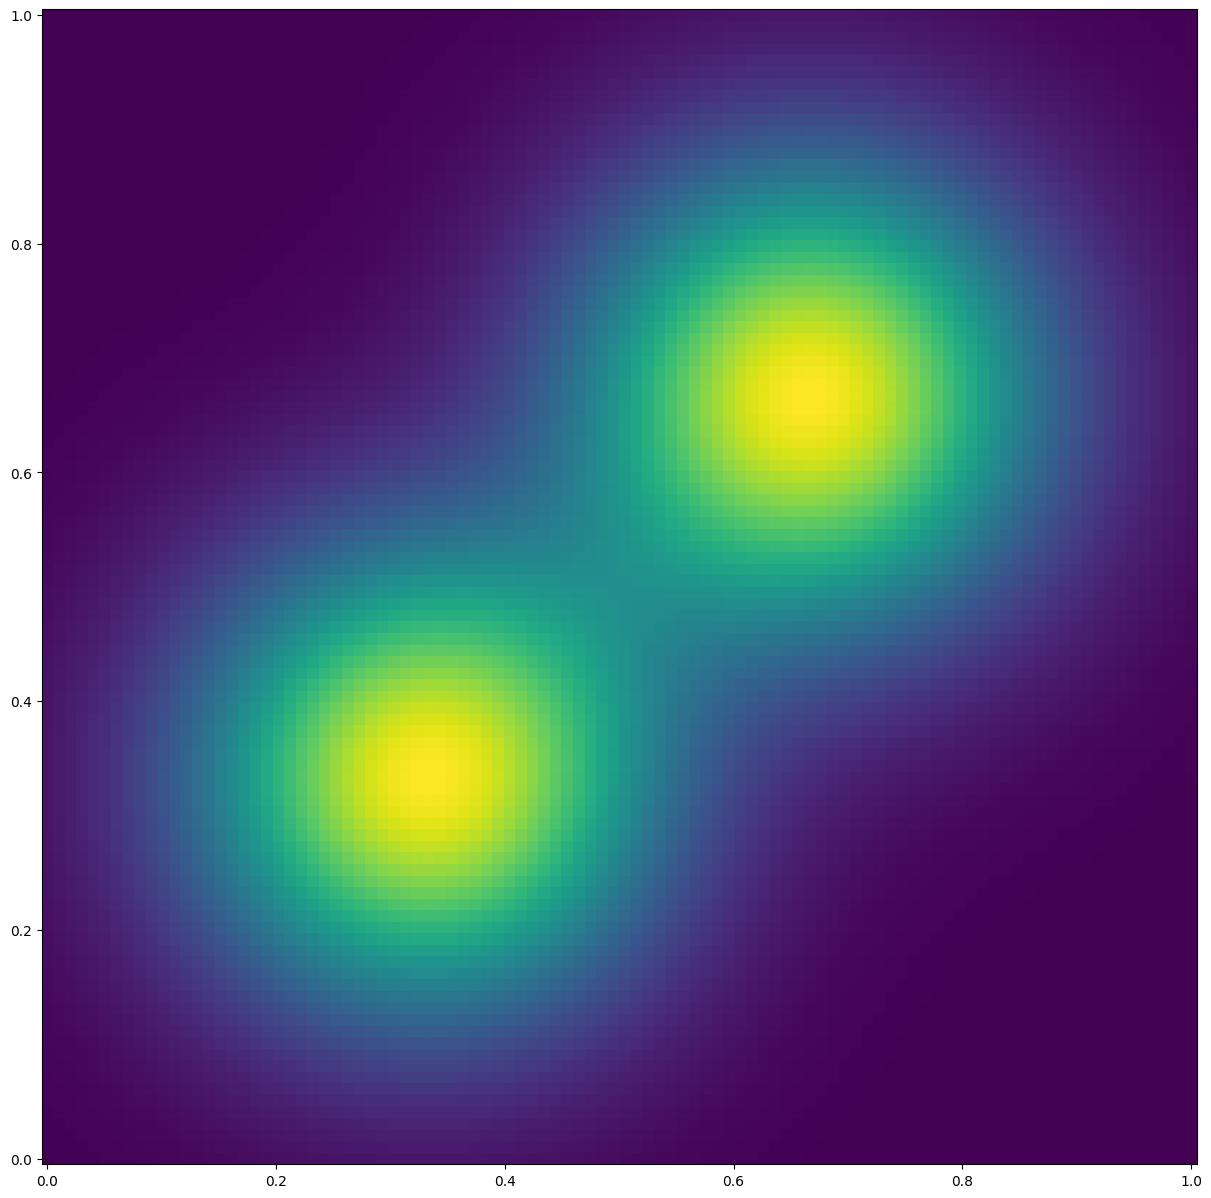

In [21]:
# Plot target distribution
# x_np, _ = make_moons(2 ** 20, noise=0.1)
# plt.figure(figsize=(15, 15))
# plt.hist2d(x_np[:, 0], x_np[:, 1], bins=200)
# plt.show()

# Plot initial flow distribution
grid_size = 100
xx, yy = torch.meshgrid(torch.linspace(0.0, 1.0, grid_size), torch.linspace(0.0, 1.0, grid_size))
zz = torch.cat([xx.unsqueeze(2), yy.unsqueeze(2)], 2).view(-1, 2)
zz = zz.to(device)

nfm.eval()
log_prob = nfm.p.log_prob(zz).to('cpu').view(*xx.shape)
prob = nfm.p.prob(zz).to('cpu').view(*xx.shape)
#prob = nfm.p.prob(zz).to('cpu').view(*xx.shape)
#print(prob, log_prob)
log_q = nfm.log_prob(zz).to('cpu').view(*xx.shape)
print(prob)
#log_prob = log_prob - log_q
print(log_prob,log_q)
nfm.train()
prob = torch.exp(log_prob)
prob[torch.isnan(prob)] = 0

plt.figure(figsize=(15, 15))
plt.pcolormesh(xx, yy, prob.data.numpy())
plt.gca().set_aspect('equal', 'box')
plt.show()

 25%|█████████▉                              | 498/2000 [00:29<01:27, 17.22it/s]

tensor(1.0154, grad_fn=<MeanBackward0>) tensor(0.0346, grad_fn=<MeanBackward0>)
Gradient of flows.0.prqct.transform_net.final_layer.weight is 
tensor([[ 0.0098],
        [ 0.0061],
        [ 0.0069],
        [ 0.0070],
        [-0.0085],
        [-0.0084],
        [-0.0027],
        [-0.0100],
        [-0.0008],
        [ 0.0024],
        [-0.0002],
        [-0.0080],
        [ 0.0050],
        [ 0.0037],
        [-0.0030],
        [ 0.0010],
        [-0.0002],
        [ 0.0006],
        [ 0.0020],
        [-0.0013],
        [ 0.0012],
        [ 0.0006],
        [-0.0003],
        [ 0.0003],
        [-0.0007]])
Gradient of flows.0.prqct.transform_net.final_layer.bias is 
tensor([ 0.0164,  0.0091,  0.0106,  0.0115, -0.0103, -0.0147, -0.0063, -0.0164,
        -0.0031,  0.0025, -0.0019, -0.0129,  0.0067,  0.0094, -0.0034,  0.0027,
         0.0003,  0.0003,  0.0040, -0.0020,  0.0028, -0.0011,  0.0012,  0.0026,
        -0.0027])
Gradient of flows.0.prqct.unconditional_transform.unnormalized

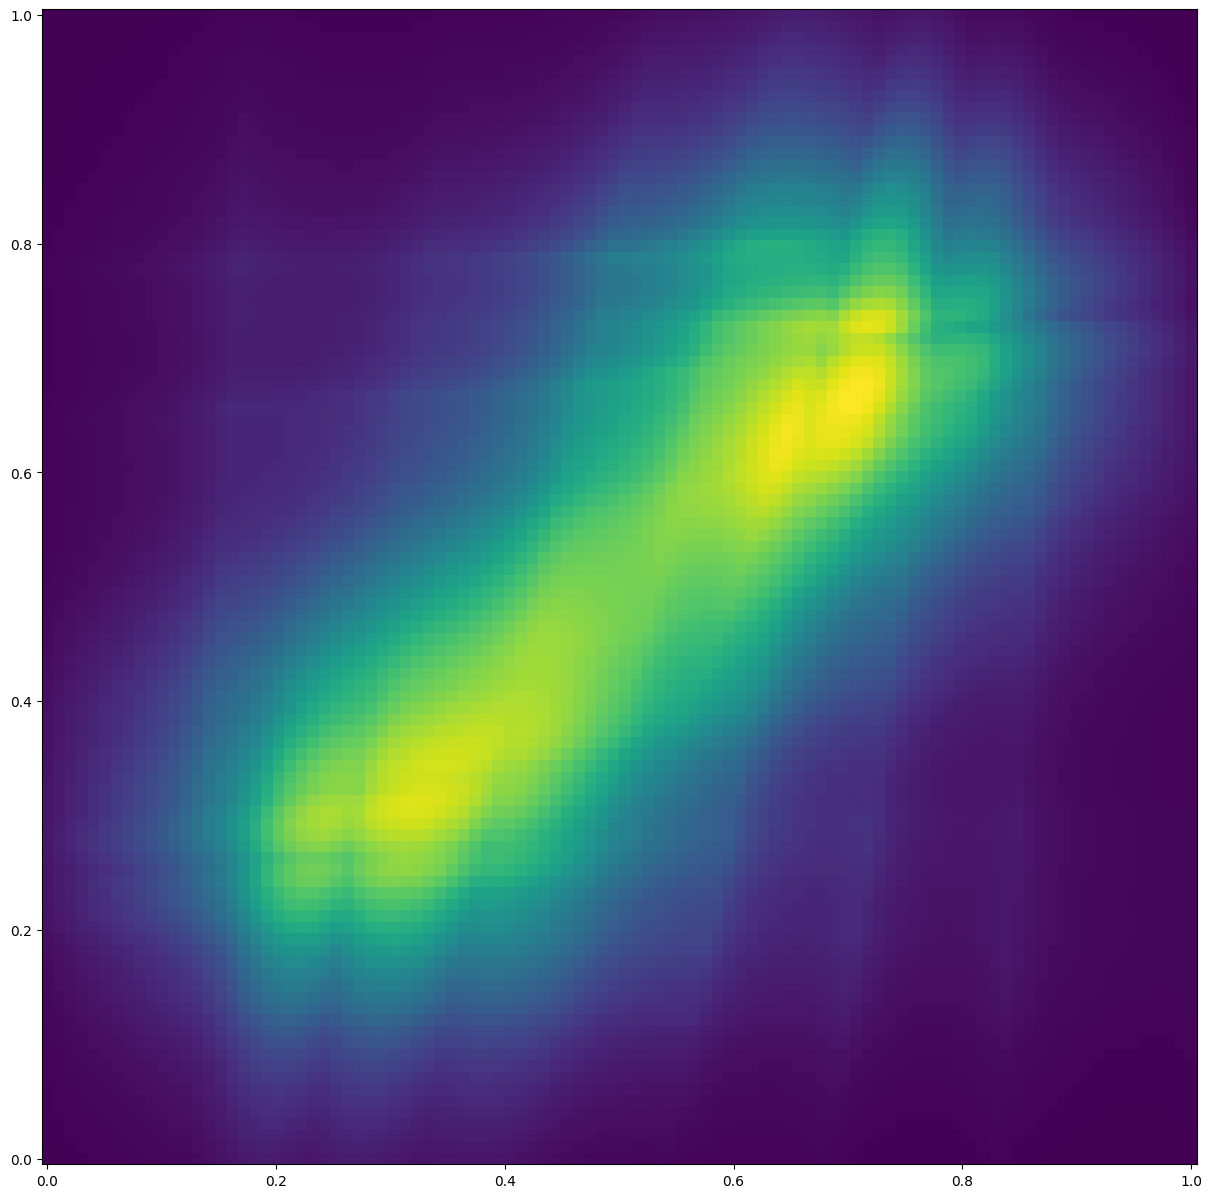

 50%|███████████████████▉                    | 998/2000 [00:59<01:00, 16.56it/s]

tensor(1.0046, grad_fn=<MeanBackward0>) tensor(0.0257, grad_fn=<MeanBackward0>)
Gradient of flows.0.prqct.transform_net.final_layer.weight is 
tensor([[ 3.0908e-04],
        [ 1.9577e-03],
        [ 2.1873e-03],
        [-4.6961e-04],
        [-2.4383e-03],
        [-6.8628e-04],
        [-1.7668e-04],
        [-6.8313e-04],
        [ 1.6993e-03],
        [ 3.3928e-04],
        [-7.1185e-04],
        [-3.6603e-04],
        [ 1.6768e-03],
        [-2.5472e-04],
        [-5.8544e-04],
        [-1.7974e-03],
        [ 6.8789e-04],
        [-1.8116e-04],
        [ 5.7301e-04],
        [-6.6086e-05],
        [-1.0004e-04],
        [ 3.1601e-04],
        [-2.0682e-03],
        [ 3.0405e-03],
        [-1.7037e-03]])
Gradient of flows.0.prqct.transform_net.final_layer.bias is 
tensor([-0.0024,  0.0021,  0.0023, -0.0025, -0.0023,  0.0014, -0.0006,  0.0020,
         0.0022, -0.0014, -0.0028,  0.0019,  0.0013, -0.0008,  0.0014, -0.0019,
         0.0009,  0.0009,  0.0009,  0.0018, -0.0011, -0.0005

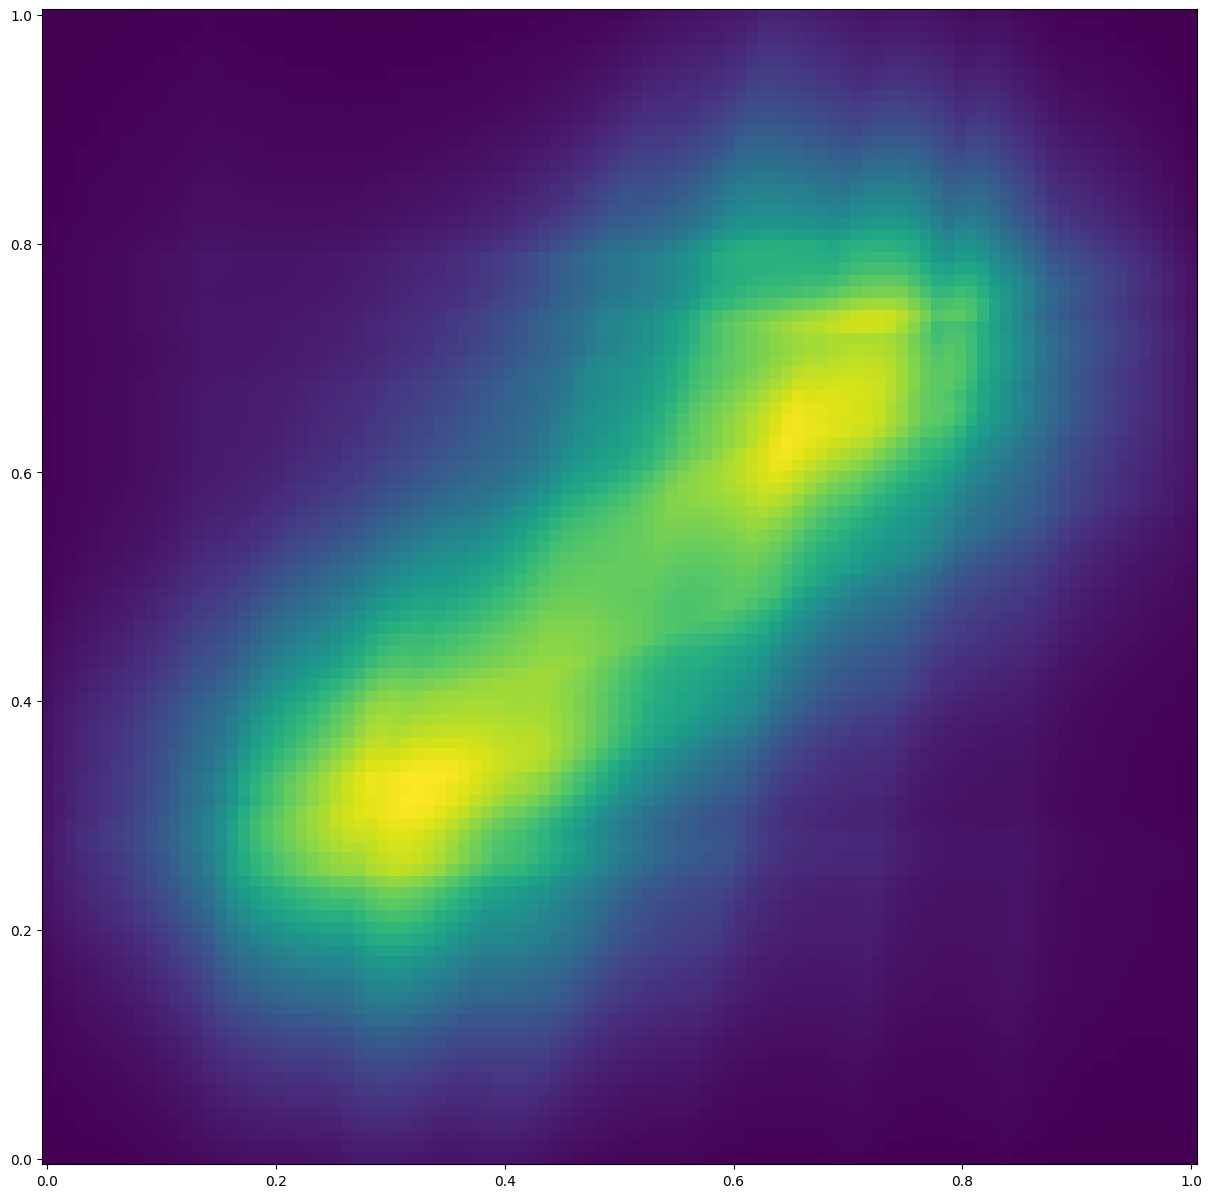

 75%|█████████████████████████████▏         | 1498/2000 [01:31<00:30, 16.53it/s]

tensor(0.9991, grad_fn=<MeanBackward0>) tensor(0.0227, grad_fn=<MeanBackward0>)
Gradient of flows.0.prqct.transform_net.final_layer.weight is 
tensor([[ 0.0052],
        [ 0.0037],
        [ 0.0050],
        [-0.0029],
        [-0.0009],
        [-0.0029],
        [-0.0014],
        [-0.0058],
        [-0.0015],
        [ 0.0003],
        [-0.0034],
        [ 0.0027],
        [ 0.0013],
        [ 0.0004],
        [-0.0007],
        [ 0.0009],
        [ 0.0002],
        [-0.0011],
        [ 0.0020],
        [ 0.0004],
        [-0.0006],
        [ 0.0018],
        [ 0.0006],
        [-0.0015],
        [-0.0008]])
Gradient of flows.0.prqct.transform_net.final_layer.bias is 
tensor([ 0.0096,  0.0039,  0.0073, -0.0048,  0.0005, -0.0056, -0.0013, -0.0096,
        -0.0041,  0.0014, -0.0059,  0.0070,  0.0013,  0.0018, -0.0033,  0.0018,
         0.0011, -0.0017,  0.0045,  0.0027, -0.0024,  0.0028,  0.0006, -0.0034,
        -0.0023])
Gradient of flows.0.prqct.unconditional_transform.unnormalized

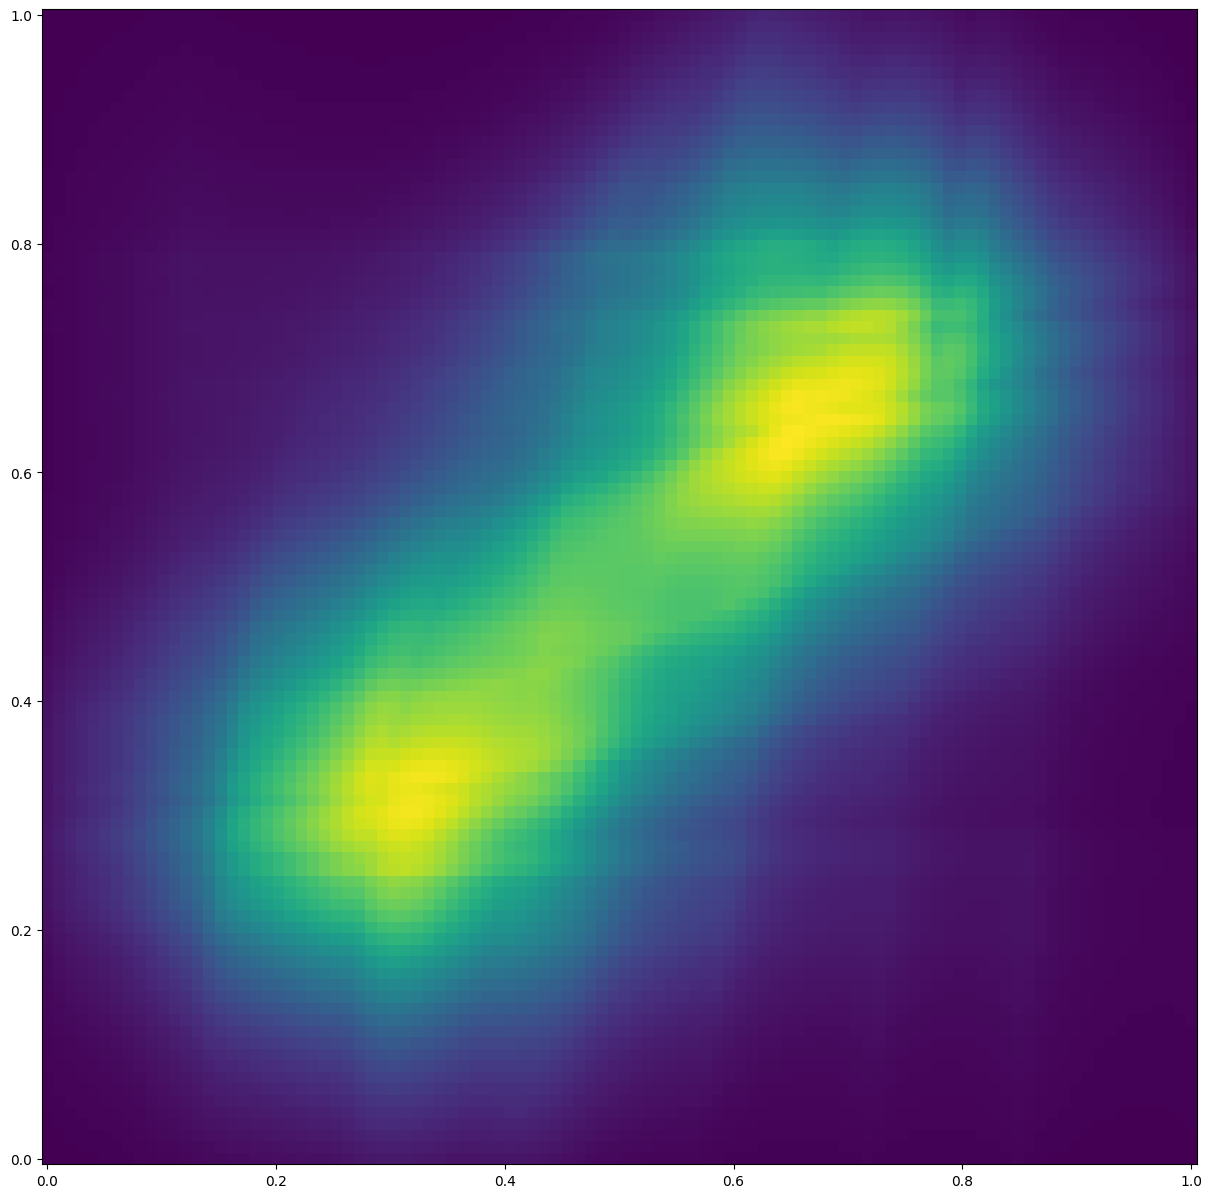

100%|██████████████████████████████████████▉| 1998/2000 [02:06<00:00, 14.42it/s]

tensor(0.9947, grad_fn=<MeanBackward0>) tensor(0.0213, grad_fn=<MeanBackward0>)
Gradient of flows.0.prqct.transform_net.final_layer.weight is 
tensor([[ 0.0061],
        [ 0.0082],
        [ 0.0072],
        [-0.0019],
        [-0.0036],
        [-0.0057],
        [-0.0029],
        [-0.0074],
        [-0.0008],
        [-0.0018],
        [-0.0019],
        [-0.0002],
        [ 0.0008],
        [ 0.0021],
        [-0.0002],
        [ 0.0019],
        [-0.0008],
        [ 0.0010],
        [ 0.0013],
        [-0.0020],
        [ 0.0011],
        [ 0.0005],
        [ 0.0010],
        [-0.0004],
        [-0.0002]])
Gradient of flows.0.prqct.transform_net.final_layer.bias is 
tensor([ 1.7193e-02,  1.5909e-02,  1.6022e-02,  3.5242e-03, -7.5782e-03,
        -1.3574e-02, -1.4527e-02, -1.6969e-02, -4.1330e-03, -3.5154e-03,
        -4.8634e-03, -2.7933e-03,  2.7449e-03,  4.7866e-03,  2.5542e-03,
         5.2195e-03, -1.1137e-03,  2.2403e-03,  2.0231e-03, -2.2979e-03,
        -4.6338e-04,  1.3437

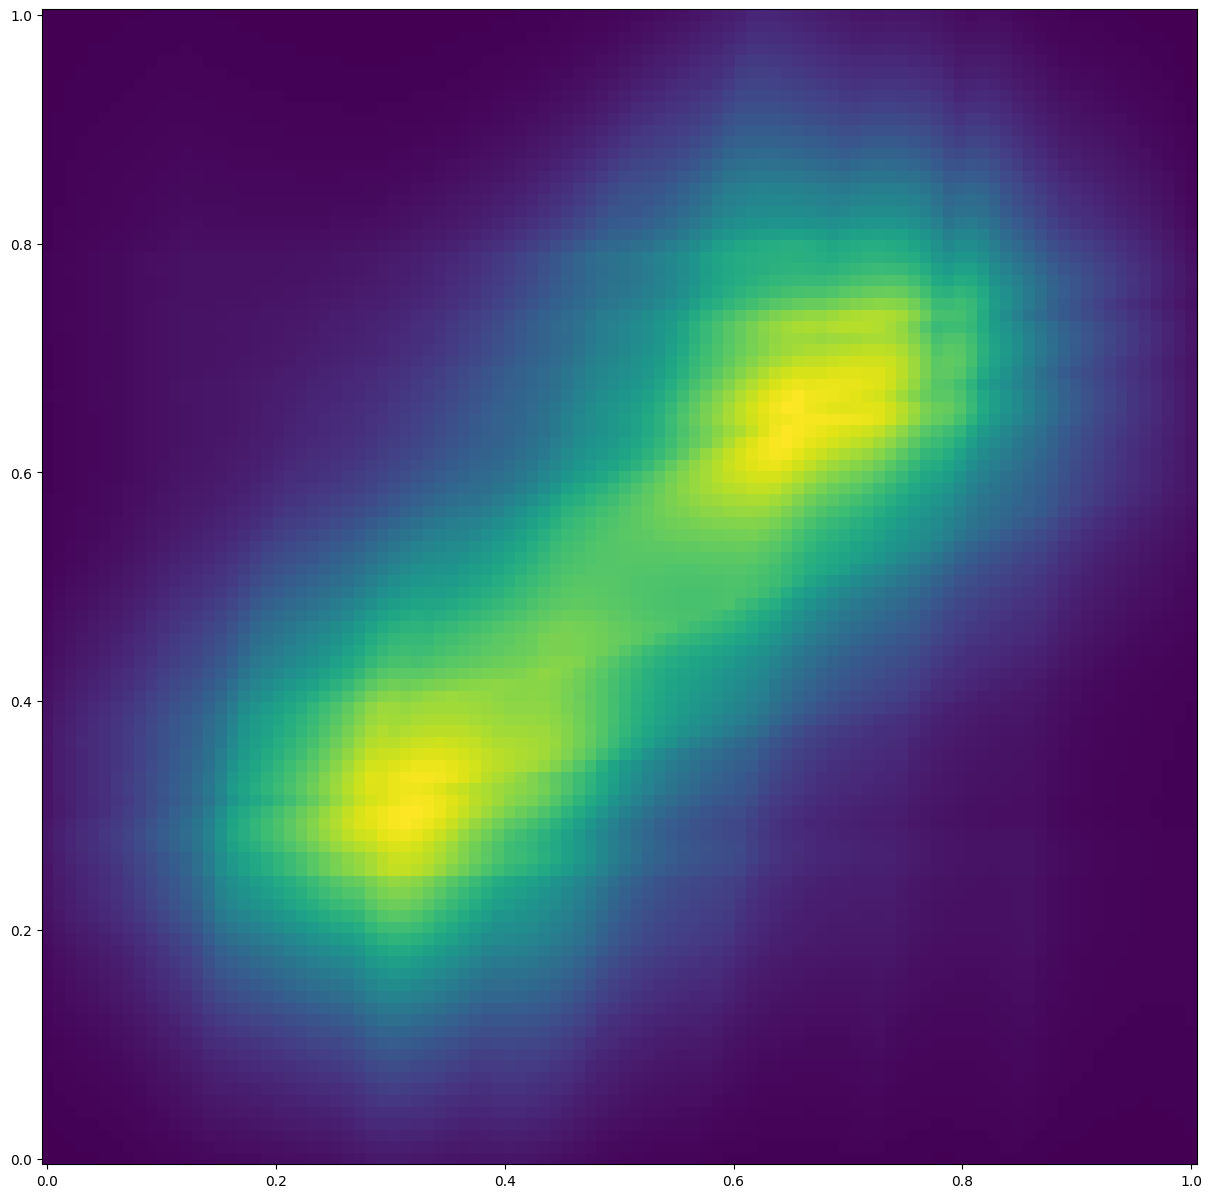

100%|███████████████████████████████████████| 2000/2000 [02:07<00:00, 15.71it/s]


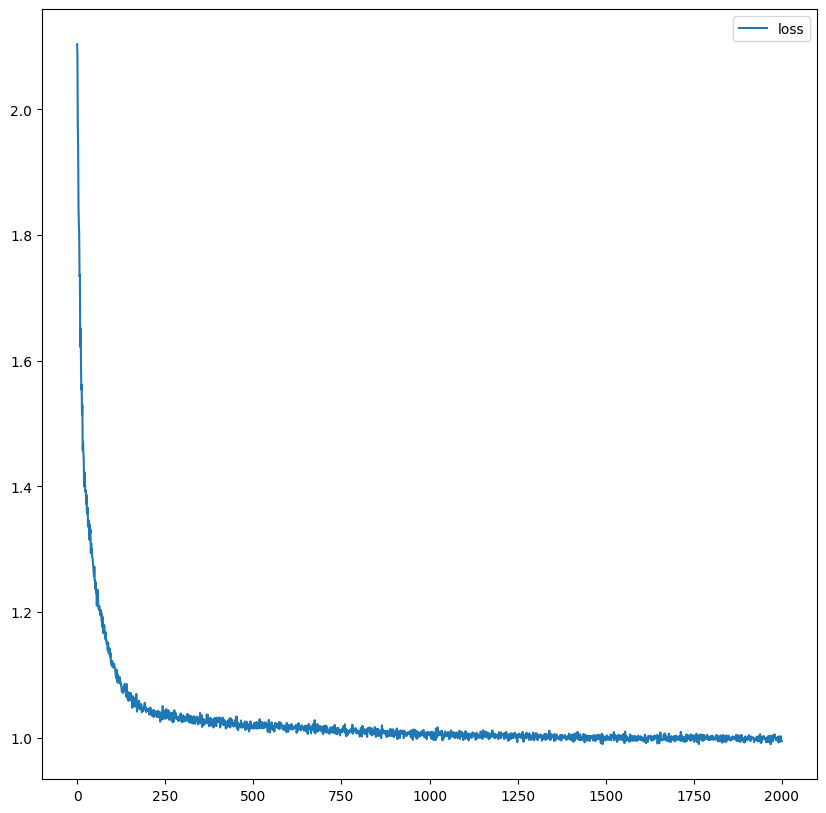

In [22]:
# Train model
max_iter = 2000
num_samples = 10000
show_iter = 500
clip = 10.0

loss_hist = np.array([])

optimizer = torch.optim.Adam(nfm.parameters(), lr=1e-2)#, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, max_iter)
for it in tqdm(range(max_iter)):
    optimizer.zero_grad()
    
    # Get training samples
#     x_np, _ = make_moons(num_samples, noise=0.1)
#     x = torch.tensor(x_np).float().to(device)
    
    # Compute loss
#     if(it<max_iter/2):
#         loss = nfm.reverse_kld(num_samples)
#     else:
    loss = nfm.MCvar(num_samples)
    #loss = nfm.IS_forward_kld(num_samples)
    loss2 = nfm.IS_forward_kld(num_samples)
    
    # Do backprop and optimizer step
    if ~(torch.isnan(loss) | torch.isinf(loss)):
        loss.backward()
        if (it+1)%show_iter == 0:
            print(loss, loss2)
            # make_dot(z, params=dict(nfm.named_parameters()))
            for name, param in nfm.named_parameters():
                print(f"Gradient of {name} is \n{param.grad}")
        torch.nn.utils.clip_grad_value_(nfm.parameters(), clip)
        optimizer.step()
    
    # Log loss
    loss_hist = np.append(loss_hist, loss.to('cpu').data.numpy())
    
    # Plot learned distribution
    if (it + 1) % show_iter == 0:
        nfm.eval()
        log_prob = nfm.log_prob(zz)
        nfm.train()
        prob = torch.exp(log_prob.to('cpu').view(*xx.shape))
        prob[torch.isnan(prob)] = 0

        plt.figure(figsize=(15, 15))
        plt.pcolormesh(xx, yy, prob.data.numpy())
        plt.gca().set_aspect('equal', 'box')
        plt.show()
    scheduler.step()


# Plot loss
plt.figure(figsize=(10, 10))
plt.plot(loss_hist, label='loss')
plt.legend()
plt.show()

tensor([[-0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [-0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.]]) tensor([[-2.3842e-07, -2.3842e-07, -2.9802e-07,  ..., -3.5763e-07,
         -1.1921e-07, -2.3842e-07],
        [-2.3842e-07, -2.3842e-07, -2.9802e-07,  ..., -3.5763e-07,
         -1.1921e-07, -2.3842e-07],
        [-2.9802e-07, -2.9802e-07, -3.5763e-07,  ..., -4.1723e-07,
         -1.7881e-07, -2.9802e-07],
        ...,
        [-3.5763e-07, -3.5763e-07, -4.1723e-07,  ..., -4.7684e-07,
         -2.3842e-07, -3.5763e-07],
        [-1.1921e-07, -1.1921e-07, -1.7881e-07,  ..., -2.3842e-07,
          0.0000e+00, -1.1921e-07],
        [-2.3842e-07, -2.3842e-07, -2.9802e-07,  ..., -3.5763e-07,
         -1.1921e-07, -2.3842e-07]], grad_fn=<ViewBackward0>)


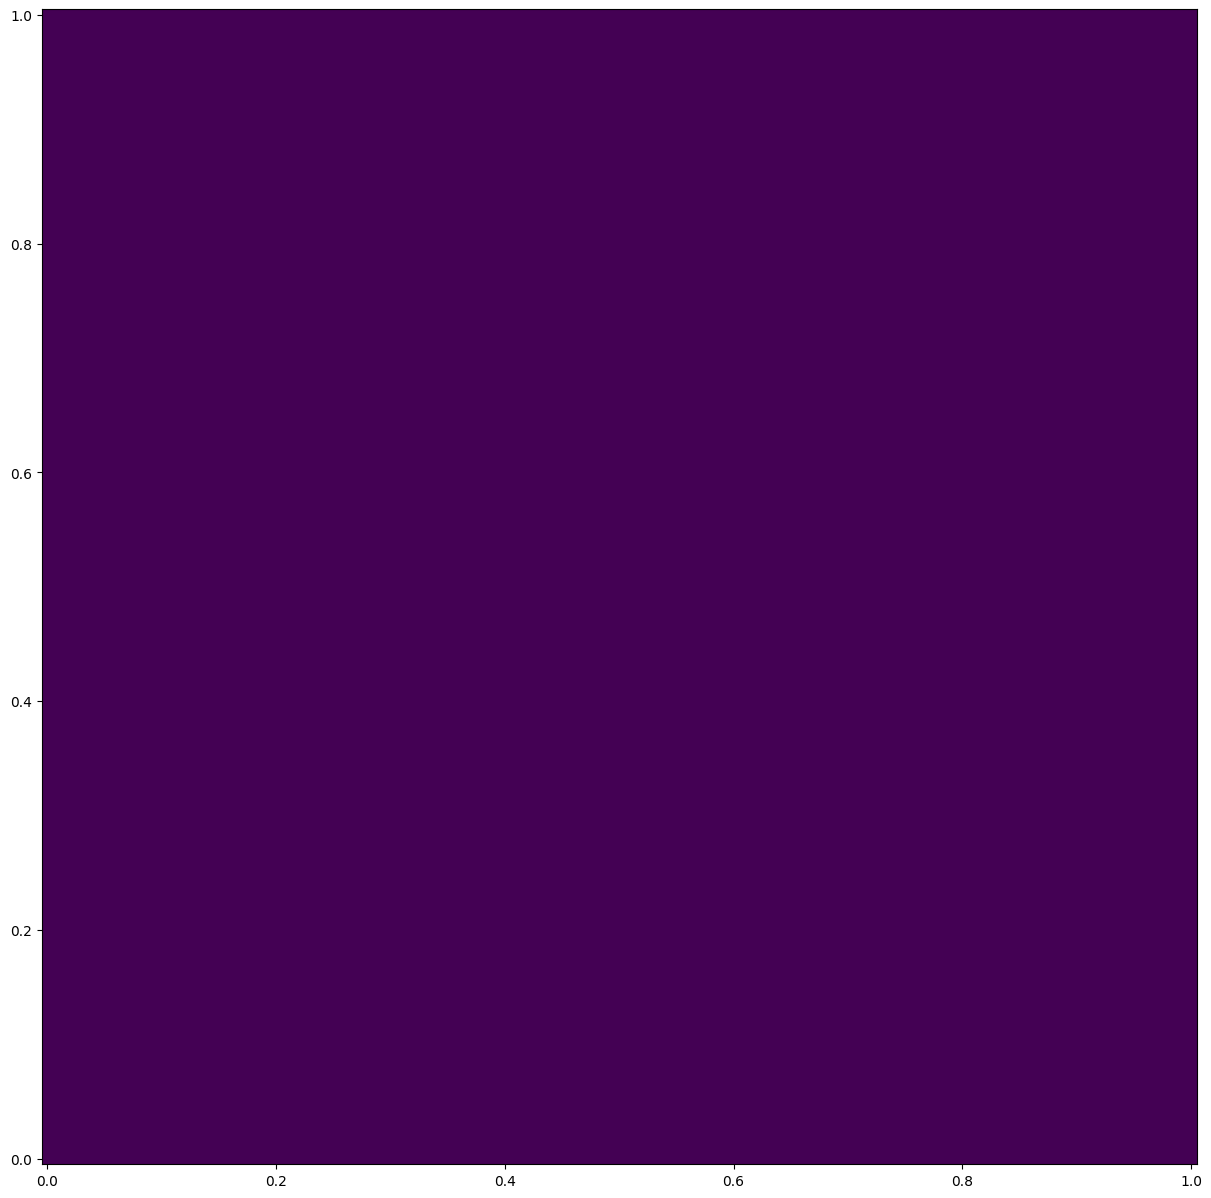

In [23]:
# Plot target distribution
# x_np, _ = make_moons(2 ** 20, noise=0.1)
# plt.figure(figsize=(15, 15))
# plt.hist2d(x_np[:, 0], x_np[:, 1], bins=200)
# plt.show()

# Plot initial flow distribution
grid_size = 100
xx, yy = torch.meshgrid(torch.linspace(0.0, 1.0, grid_size), torch.linspace(0.0, 1.0, grid_size))
zz = torch.cat([xx.unsqueeze(2), yy.unsqueeze(2)], 2).view(-1, 2)
zz = zz.to(device)

nfm.eval()
#log_prob = nfm.p.log_prob(zz).to('cpu').view(*xx.shape)
#prob = nfm.p.prob(zz).to('cpu').view(*xx.shape)
#prob = nfm.p.prob(zz).to('cpu').view(*xx.shape)
#print(prob, log_prob)
log_prob = nfm.q0.log_prob(zz).to('cpu').view(*xx.shape)
#print(prob)
#log_prob = log_prob - log_q
print(log_prob,log_q)
nfm.train()
prob = torch.exp(log_prob)
prob[torch.isnan(prob)] = 0

plt.figure(figsize=(15, 15))
plt.pcolormesh(xx, yy, prob.data.numpy())
plt.gca().set_aspect('equal', 'box')
plt.show()

Estimating integral from trained network


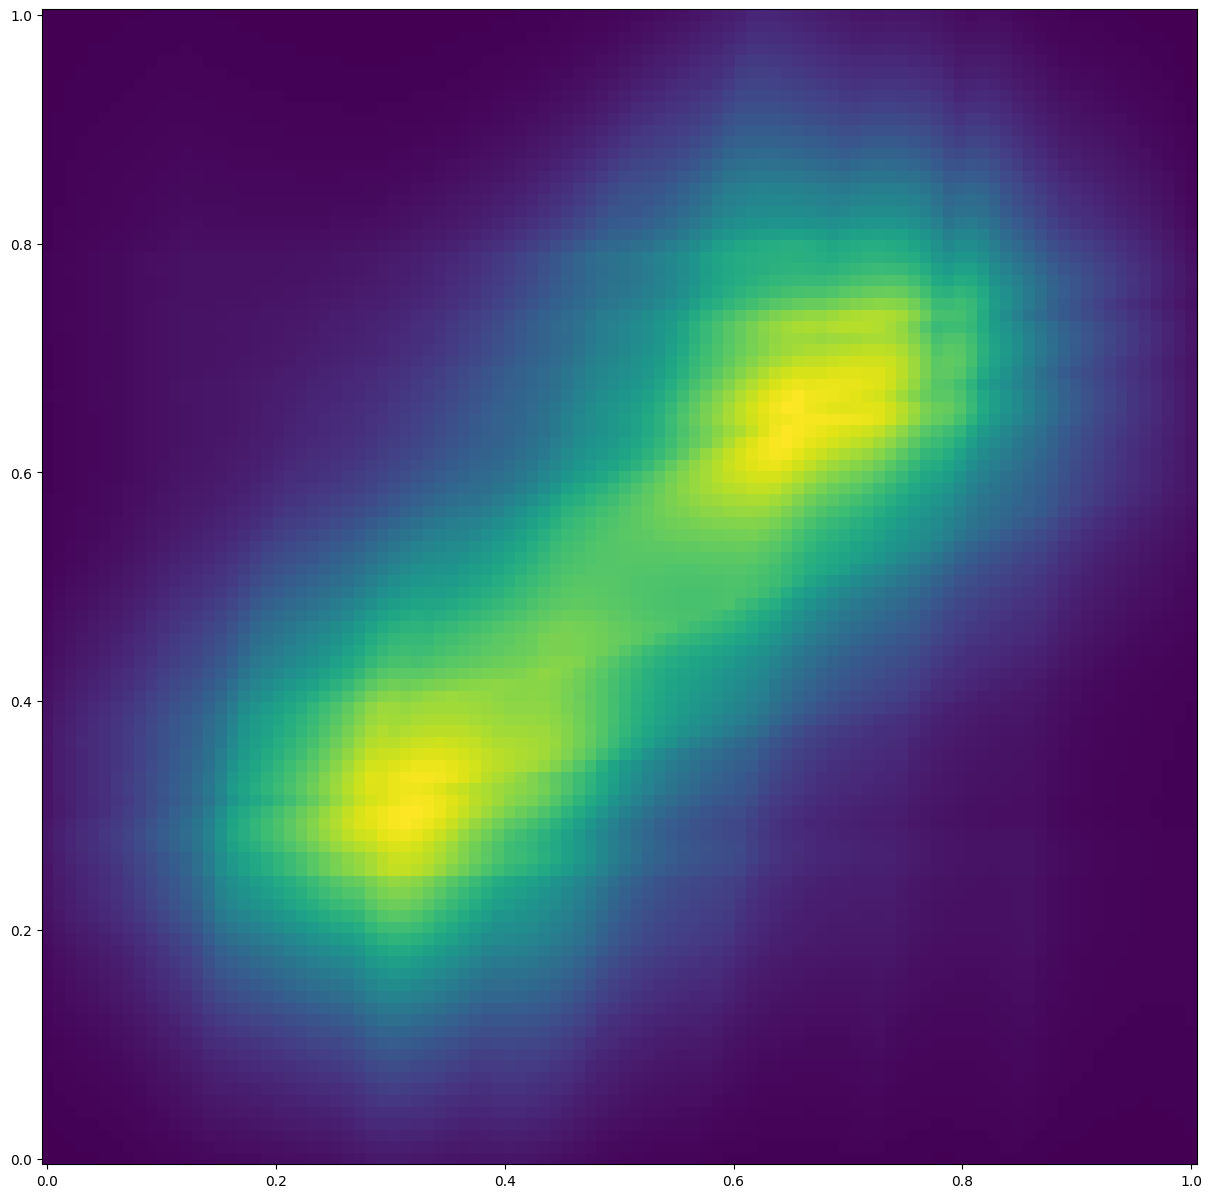

AttributeError: 'Camel' object has no attribute 'targetval'

In [24]:
# Plot learned distribution
nfm.eval()
samples, logdetJ = nfm.sample(100000)
mean, variance = nfm.integrate_block(100000, 100)
log_prob = nfm.log_prob(zz).to('cpu').view(*xx.shape)
nfm.train()

prob = torch.exp(log_prob)
prob[torch.isnan(prob)] = 0

plt.figure(figsize=(15, 15))
plt.pcolormesh(xx, yy, prob.data.numpy())
plt.gca().set_aspect('equal', 'box')
plt.show()
alpha = 0.2
ndims = 2
target_val = erf(1/(2.*alpha))**ndims
print(samples.shape, mean, variance, nfm.p.targetval)

In [ ]:
samples_np = samples.detach().numpy()
print(samples_np)
# Create a 2D histogram of the samples
hist, xedges, yedges = np.histogram2d(samples_np[:,0], samples_np[:,1], bins=50, density=True)

# Generate the x and y coordinates for the centers of the bins
xcenters = (xedges[:-1] + xedges[1:]) / 2
ycenters = (yedges[:-1] + yedges[1:]) / 2
X, Y = np.meshgrid(xcenters, ycenters)

# Plot the heatmap
plt.figure(figsize=(15, 15))
plt.pcolormesh(X, Y, hist, shading='auto')
plt.colorbar() # Show color scale
plt.gca().set_aspect('equal', 'box') # Keep aspect ratio square
plt.title('Sample Density Distribution Heatmap')
plt.show()